<a href="https://colab.research.google.com/github/avyay10/Resources-for-SeSiGAN/blob/main/BrainAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 80 kB 1.6 MB/s 
     |████████████████████████████████| 1.1 MB 5.2 MB/s 
     |████████████████████████████████| 15.8 MB 627 bytes/s 
     |████████████████████████████████| 76 kB 5.1 MB/s 
     |████████████████████████████████| 125 kB 67.5 MB/s 
     |████████████████████████████████| 786 kB 50.8 MB/s 
     |████████████████████████████████| 779 kB 23.9 MB/s 
     |████████████████████████████████| 778 kB 58.3 MB/s 
     |████████████████████████████████| 776 kB 58.7 MB/s 
     |████████████████████████████████| 769 kB 58.2 MB/s 
     |████████████████████████████████| 766 kB 61.6 MB/s 
     |████████████████████████████████| 1.0 MB 62.0 MB/s 
     |████████████████████████████████| 722 kB 61.7 MB/s 
     |████████████████████████████████| 722 kB 61.1 MB/s 
     |████████████████████████████████| 715 kB 52.9 MB/s 
     |████████████████████████████████| 705 kB 52.5 MB/s 
     |████████████████████████████████| 699 kB 49.1 MB/s 
     |██████████

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
import umap
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [2]:
os.listdir('/content/drive/MyDrive/DATASET')

['NO', 'yes-20211014T112704Z-001']

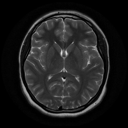

In [3]:
im =Image.open('/content/drive/MyDrive/DATASET/NO/no-20211014T110424Z-001/no/1 no.jpeg').resize((128,128))
im

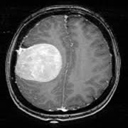

In [4]:
im =Image.open('/content/drive/MyDrive/DATASET/yes-20211014T112704Z-001/yes/Y1.jpg').resize((128,128))
im

In [6]:
yes=os.listdir('/content/drive/MyDrive/DATASET/yes-20211014T112704Z-001/yes')
no=os.listdir('/content/drive/MyDrive/DATASET/NO/no-20211014T110424Z-001/no')

In [7]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [8]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [9]:
len(data_target)==len(data)

True

In [10]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
data

array(['Y1.jpg', 'Y103.jpg', 'Y10.jpg', 'Y105.jpg', 'Y101.jpg',
       'Y102.jpg', 'Y100.JPG', 'Y164.JPG', 'Y163.JPG', 'Y161.JPG',
       'Y162.jpg', 'Y160.JPG', 'Y16.JPG', 'Y158.JPG', 'Y159.JPG',
       'Y157.JPG', 'Y156.JPG', 'Y155.JPG', 'Y148.JPG', 'Y154.jpg',
       'Y15.jpg', 'Y153.jpg', 'Y147.JPG', 'Y146.JPG', 'Y14.jpg',
       'Y120.JPG', 'Y13.jpg', 'Y12.jpg', 'Y117.JPG', 'Y116.JPG',
       'Y115.JPG', 'Y113.JPG', 'Y114.JPG', 'Y112.JPG', 'Y111.JPG',
       'Y11.jpg', 'Y109.JPG', 'Y108.jpg', 'Y107.jpg', 'Y106.jpg',
       'Y104.jpg', 'Y252.jpg', 'Y250.jpg', 'Y251.JPG', 'Y25.jpg',
       'Y249.JPG', 'Y248.JPG', 'Y247.JPG', 'Y244.JPG', 'Y245.jpg',
       'Y246.JPG', 'Y243.JPG', 'Y242.JPG', 'Y24.jpg', 'Y23.JPG',
       'Y22.jpg', 'Y21.jpg', 'Y20.jpg', 'Y2.jpg', 'Y195.JPG', 'Y194.jpg',
       'Y193.JPG', 'Y19.JPG', 'Y188.jpg', 'Y187.jpg', 'Y192.JPG',
       'Y186.jpg', 'Y185.jpg', 'Y184.JPG', 'Y183.jpg', 'Y182.JPG',
       'Y181.jpg', 'Y18.JPG', 'Y170.JPG', 'Y180.jpg', 'Y17.jpg',
   

In [12]:
yes_values=os.listdir('/content/drive/MyDrive/DATASET/yes-20211014T112704Z-001/yes')
no_values=os.listdir('/content/drive/MyDrive/DATASET/NO/no-20211014T110424Z-001/no')

In [13]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/drive/MyDrive/DATASET/yes-20211014T112704Z-001/yes'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

error: ignored

In [ ]:
X_data =[]
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/drive/MyDrive/DATASET/NO/no-20211014T110424Z-001/no'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

error: ignored

In [ ]:
len(X_data)==len(data)==len(data_target)

False

In [ ]:
X = np.squeeze(X_data)

In [ ]:
X.shape

(0,)

In [ ]:
# normalize data
X = X.astype('float32')
X /= 255

In [ ]:
#categorical_labels = to_categorical(data_target, num_classes=2)

In [ ]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          4

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [ ]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

ValueError: ignored

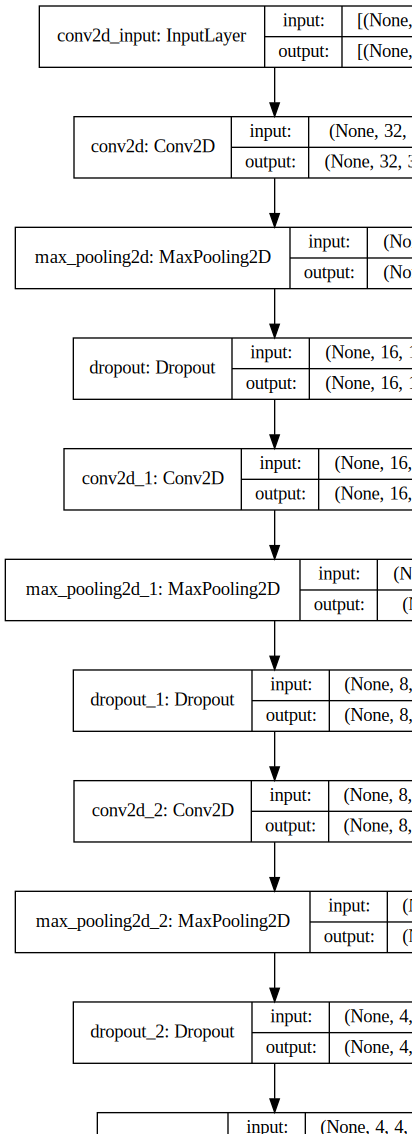

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

ValueError: ignored

In [ ]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

ValueError: ignored